In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import growth_model as gm
import tox_model as tm
import scheduler as sch
import file_manipulation as fm

In [27]:
with open('patient_config.json') as f:
    patient_config = json.load(f)
patient_config

{'toxicity': 1.6433127155860012,
 'burden': 0.8708684897640193,
 'r': 0.7319939418114051,
 'a': 0.5986584841970366,
 's1': 0.15601864044243652,
 's2': 0.15599452033620265,
 's3': 0.05808361216819946,
 's4': 0.8661761457749352,
 'tx1': 0.6011150117432088,
 'tx2': 0.7080725777960455,
 'tx3': 0.020584494295802447,
 'tx4': 0.9699098521619943,
 'clear': 0.8324426408004217,
 'start_strike': 1,
 'start_cycle': 1}

In [28]:
S = fm.get_plan(patient_config)
S

AttributeError: module 'file_manipulation' has no attribute 'get_plan'

In [ ]:
fm.get_toxicities(patient_config)

[0.6011150117432088,
 0.7080725777960455,
 0.020584494295802447,
 0.9699098521619943]

In [ ]:
assert len(sch.plan_to_schedule(*S, 1, 1)) == 18
assert len(sch.plan_to_schedule(*S, 4, 5)) == 1

In [ ]:
test_cycles_1= np.array([
    [1, 0.5, 1, 2],
    [1, 0.3, 5, 9],
    [2, 0.9, 2, 20],
    [2, 0.9, 10, 20],
    [3, 0.8, 30, 40],
    [4, 0.8, 70, 80],
    ], dtype=float)

test_cycles_2 = np.array([
    [1, 0.0, 0, 2],
    [1, 0.0, 5, 9],
    [1, 0.0, 10, 15],
    [1, 1.0, 20, 30],
    [2, 0.0, 2, 20],
    [2, 0.75, 100, 120],
    [3, 0.0, 30, 40],
    [4, 0.0, 70, 80],
    ], dtype=float)

0.022619203681786538


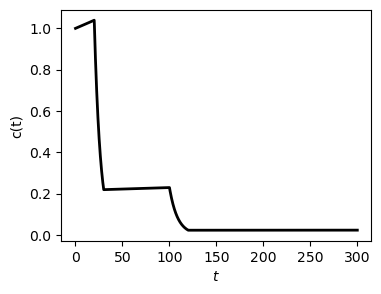

In [30]:
a = 1
sol = gm.tumour_growth(10000, 300, test_cycles_2, a, S, TD=180.)
gm.plot_solution(sol)
print(gm.final_tumour_volume(sol))

In [29]:
gen_cycles = np.array(sch.plan_to_schedule(*S, 1, 1), dtype=object)
sol = gm.tumour_growth(1, 300, gen_cycles, a, S, TD=180.)
gm.plot_solution(sol)
print(gm.final_tumour_volume(sol))

rv_cb_arr is NULL
Call-back cb_f_in_lsoda__user__routines failed.


ValueError: 0-th dimension must be fixed to 1 but got 450


In [ ]:
cyc_df = fm.cycles_to_df(test_cycles_1)
cyc_df

,strike,dose,start,end
0,1,0.5,1,2
1,1,0.3,5,9
2,2,0.9,2,20
3,2,0.9,10,20
4,3,0.8,30,40
5,4,0.8,70,80


In [ ]:
plan = fm.cycles_df_to_report(cyc_df)
plan

{1.0: [{'dose': 0.5, 'start': 1.0, 'end': 2.0},
  {'dose': 'break', 'start': 2.0, 'end': 5.0},
  {'dose': 0.3, 'start': 5.0, 'end': 9.0}],
 2.0: [{'dose': 0.9, 'start': 2.0, 'end': 20.0},
  {'dose': 0.9, 'start': 10.0, 'end': 20.0}],
 3.0: [{'dose': 0.8, 'start': 30.0, 'end': 40.0}],
 4.0: [{'dose': 0.8, 'start': 70.0, 'end': 80.0}]}

In [ ]:
sch_df = fm.report_to_df(plan)
sch_df

,strike,dose,days
0,1,0.5,1
1,1,break,3
2,1,0.3,4
3,2,0.9,18
4,2,0.9,10
5,3,0.8,10
6,4,0.8,10


In [ ]:
a, b = tm.RunToxDifferenceEquation(0, 0, 365,test_cycles_1,[0.5,0.5,0.5,0.5],0.95,10.0)
tm.GenNewSched(test_cycles_1, b)

array([[ 1. ,  0.5,  1. ,  2. ],
       [ 1. ,  0.3,  5. ,  9. ],
       [ 2. ,  0.9,  2. , 20. ],
       [ 2. ,  0.9, 10. , 20. ],
       [ 3. ,  0.8, 30. , 40. ],
       [ 4. ,  0.8, 70. , 80. ]])